# Barack Obama Stock Portfolio Anti-Coal

During Obama Presidental, he shut down some coal companies.


https://en.wikipedia.org/wiki/Presidency_of_Barack_Obama

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

import warnings
warnings.filterwarnings("ignore")

# fix_yahoo_finance is used to fetch data 
import fix_yahoo_finance as yf
yf.pdr_override()

In [2]:
# input
symbols = ['BHP','VALE','HNRG','ARLP','NRP']
start = '2009-01-01'
end = '2017-01-01'

# Read data 
df = yf.download(symbols,start,end)['Adj Close']

# View Columns
df.head()

[*********************100%***********************]  5 of 5 downloaded


,ARLP,BHP,HNRG,NRP,VALE
Date,,,,,
2009-01-02,5.675083,28.928493,2.253366,143.547302,8.889145
2009-01-05,5.859945,28.960270,2.253366,151.485382,9.502422
2009-01-06,6.130282,30.511261,2.253366,160.967026,10.183092
2009-01-07,5.806278,28.222916,2.253366,153.249390,9.219371
2009-01-08,5.915604,28.483540,2.253366,156.777435,9.468725


In [3]:
df.tail()

,ARLP,BHP,HNRG,NRP,VALE
Date,,,,,
2016-12-23,16.632372,29.384541,8.283847,28.197189,7.091769
2016-12-27,16.848373,29.575399,8.274623,28.323261,7.266534
2016-12-28,16.272366,30.056707,8.422219,27.524832,7.376912
2016-12-29,15.804354,30.098196,8.431442,27.903034,7.275732
2016-12-30,16.164362,29.691578,8.385319,27.146627,7.008986


In [4]:
from datetime import datetime
from dateutil import relativedelta

d1 = datetime.strptime(start, "%Y-%m-%d")
d2 = datetime.strptime(end, "%Y-%m-%d")
delta = relativedelta.relativedelta(d2,d1)
print('How many years of investing?')
print('%s years' % delta.years)

How many years of investing?
8 years


In [5]:
from datetime import datetime

def calculate_years(start, end): 
    date_format = "%Y-%m-%d"
    a = datetime.strptime(start, date_format).year
    b = datetime.strptime(end, date_format).year
    years = b - a
  
    return years 

In [6]:
print(calculate_years(start, end), 'years')

8 years


In [7]:
Cash = 100000
print('Percentage of invest:')
percent_invest = [0.20, 0.20, 0.20, 0.20, 0.20]
for i, x in zip(df.columns, percent_invest):
    cost = x * Cash
    print('{}: {}'.format(i, cost))

Percentage of invest:
ARLP: 20000.0
BHP: 20000.0
HNRG: 20000.0
NRP: 20000.0
VALE: 20000.0


In [8]:
print('Number of Shares:')
percent_invest = [0.20, 0.20, 0.20, 0.20, 0.20]
for i, x, y in zip(df.columns, percent_invest, df.iloc[0]):
    cost = x * Cash
    shares = int(cost/y)
    print('{}: {}'.format(i, shares))

Number of Shares:
ARLP: 3524
BHP: 691
HNRG: 8875
NRP: 139
VALE: 2249


In [9]:
print('Beginning Value:')
percent_invest = [0.20, 0.20, 0.20, 0.20, 0.20]
for i, x, y in zip(df.columns, percent_invest, df.iloc[0]):
    cost = x * Cash
    shares = int(cost/y)
    Begin_Value = round(shares * y, 2)
    print('{}: ${}'.format(i, Begin_Value))

Beginning Value:
ARLP: $19998.99
BHP: $19989.59
HNRG: $19998.62
NRP: $19953.07
VALE: $19991.69


In [10]:
print('Current Value:')
percent_invest = [0.20, 0.20, 0.20, 0.20, 0.20]
for i, x, y, z in zip(df.columns, percent_invest, df.iloc[0], df.iloc[-1]):
    cost = x * Cash
    shares = int(cost/y)
    Current_Value = round(shares * z, 2)
    print('{}: ${}'.format(i, Current_Value))

Current Value:
ARLP: $56963.21
BHP: $20516.88
HNRG: $74419.71
NRP: $3773.38
VALE: $15763.21


In [11]:
result = []
percent_invest = [0.20, 0.20, 0.20, 0.20, 0.20]
for i, x, y, z in zip(df.columns, percent_invest, df.iloc[0], df.iloc[-1]):
    cost = x * Cash
    shares = int(cost/y)
    Current_Value = round(shares * z, 2)
    result.append(Current_Value)
print('Total Value: $%s' % round(sum(result),2))

Total Value: $171436.39


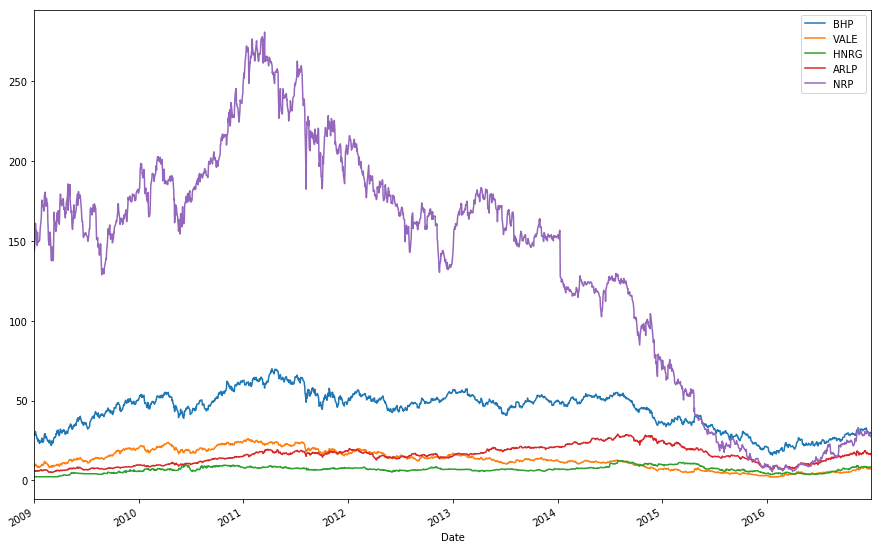

In [12]:
for s in symbols: 
    df[s].plot(label = s, figsize = (15,10))
plt.legend()

In [13]:
df.min()

ARLP     4.976706
BHP     15.747570
HNRG     2.215809
NRP      5.403183
VALE     1.965798
dtype: float64

In [14]:
for s in symbols:
    print(s + ":",  df[s].max())

BHP: 69.879852
VALE: 26.171221
HNRG: 12.330428999999999
ARLP: 28.93988
NRP: 280.747131


In [15]:
# Creating a Return Data Frame for all individual banks stocks: 
returns = pd.DataFrame()
for s in symbols: 
    returns[s + " Return"] = df[s].pct_change().dropna()
    
returns.head(4)

,BHP Return,VALE Return,HNRG Return,ARLP Return,NRP Return
Date,,,,,
2009-01-05,0.001098,0.068992,0.0,0.032574,0.055299
2009-01-06,0.053556,0.071631,0.0,0.046133,0.062591
2009-01-07,-0.075000,-0.094639,0.0,-0.052853,-0.047945
2009-01-08,0.009234,0.027047,0.0,0.018829,0.023022


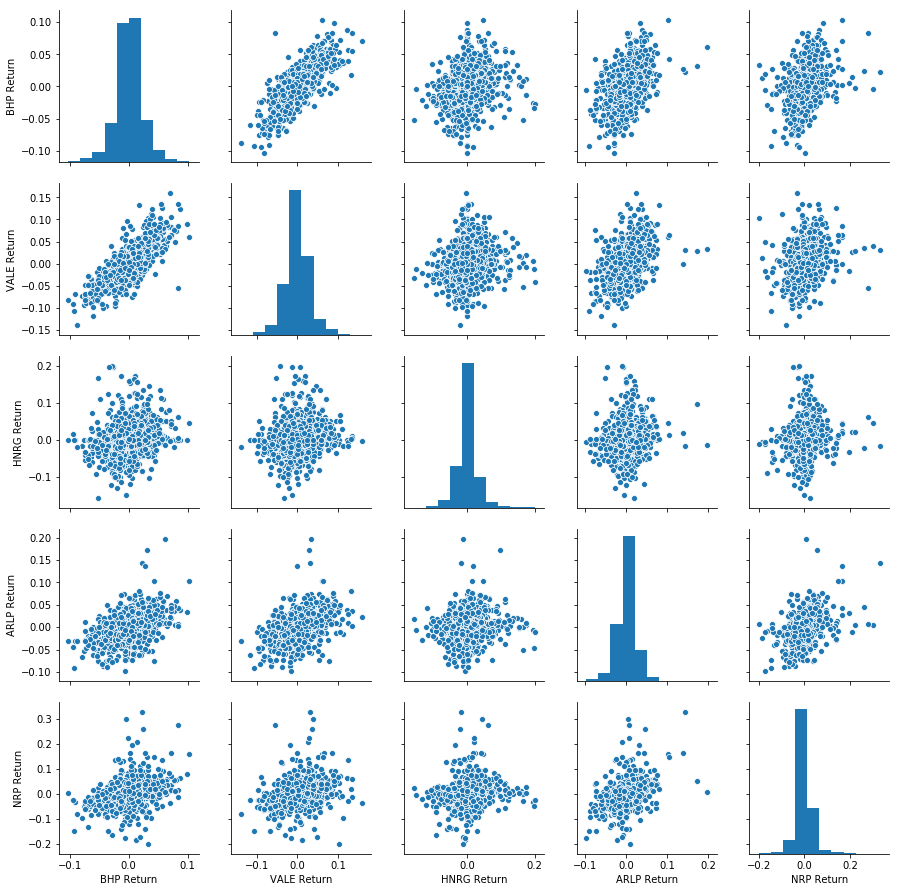

In [16]:
sns.pairplot(returns[1:] )

In [17]:
# dates each bank stock had the best and worst single day returns. 
print(returns.idxmax())

BHP Return    2011-08-09
VALE Return   2016-02-04
HNRG Return   2009-08-31
ARLP Return   2016-01-26
NRP Return    2016-01-22
dtype: datetime64[ns]


In [18]:
# dates each bank stock had the best and worst single day returns. 
print(returns.idxmin())

BHP Return    2009-01-20
VALE Return   2016-03-08
HNRG Return   2011-08-10
ARLP Return   2016-01-19
NRP Return    2015-04-22
dtype: datetime64[ns]


In [19]:
returns.corr()

,BHP Return,VALE Return,HNRG Return,ARLP Return,NRP Return
BHP Return,1.000000,0.769707,0.204551,0.453723,0.360402
VALE Return,0.769707,1.000000,0.170955,0.411494,0.318613
HNRG Return,0.204551,0.170955,1.000000,0.149231,0.119803
ARLP Return,0.453723,0.411494,0.149231,1.000000,0.413899
NRP Return,0.360402,0.318613,0.119803,0.413899,1.000000


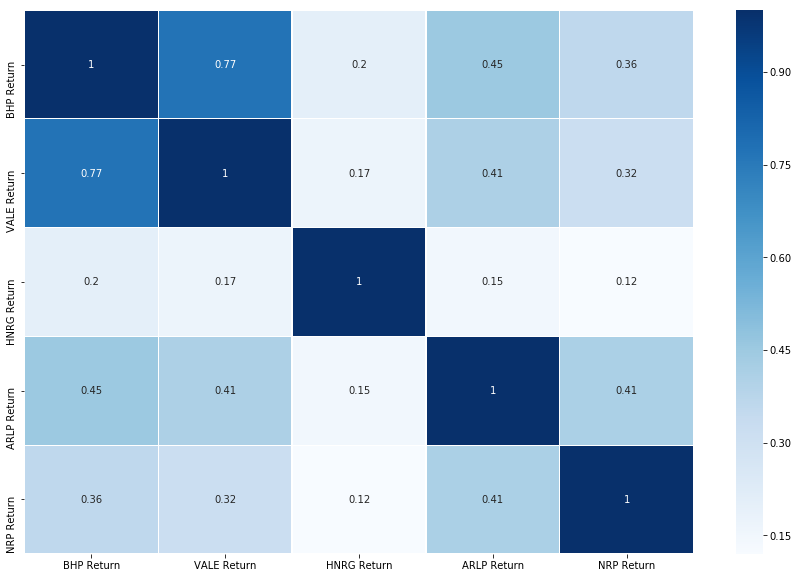

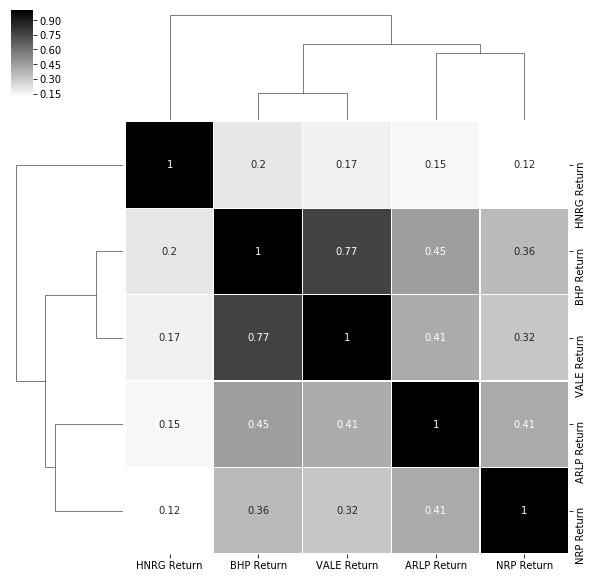

In [20]:
# Heatmap for return of all the stocks
plt.figure(figsize=(15,10))
sns.heatmap(returns.corr(), cmap="Blues",linewidths=.1, annot= True)


sns.clustermap(returns.corr(), cmap="binary",linewidths=.1, annot= True)

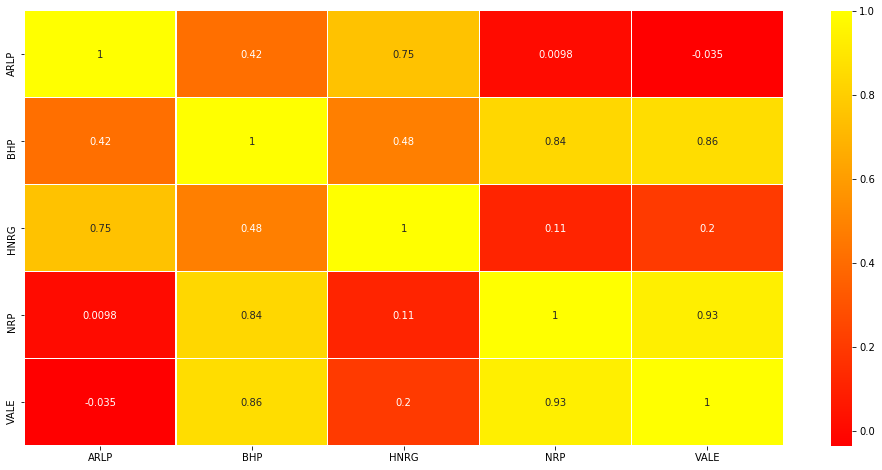

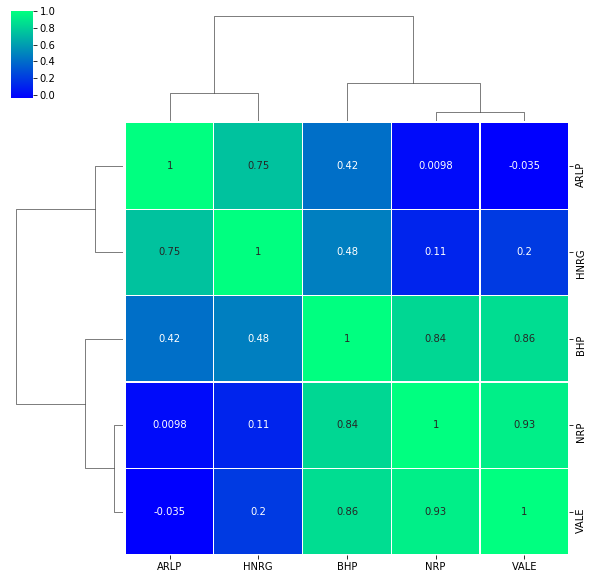

In [21]:
# heatmap for Adj. Close prices for all the stock
plt.figure(figsize = (17,8))
sns.heatmap(df.corr(), cmap="autumn",linewidths=.1, annot= True)

sns.clustermap(df.corr(), cmap="winter",linewidths=.1, annot= True)